# CS 613: Machine Learning <br> Final Project: Fraud Detection

## <u>Team Overview

- Group member 1
    - Name: Jerin Philip
    - Email: jp3839@drexel.edu
    - Currently pursuing Masters in Computer Science at Drexel University.I did my undergrad in Computer Science and Engineering. I have 3 years of experience as a Software Engineer and have worked on a variety of tech stacks including Java,Python,Django,HTML,JS,SQL,ETL(Tagetik),RPA(UiPath),SAP Hana etc.
- Group member 2
    - Name: Kartik Vora
    - Email: kav73@drexel.edu
    - Undergrad in Computer Engineering, Master's degree in Computer Science with 8 years of work experience as software developer. I have had experience for working in various domains like Middleware application development, Web development, Data Science and ML. I have learnt and worked on a variety of technology stack which includes BizTalk, C#, Python, .NET MVC, java, HTML/CSS, Jquery, SQL, Cloud - AWS, Azure.

## <u>Project Overview ##

Financial fraud, considered as deceptive tactics for gaining financial benefits, has recently become a widespread menace in companies and organizations. Conventional techniques such as manual verifications and inspections are imprecise, costly, and time consuming for identifying such fraudulent activities. With the advent of artificial intelligence, machine-learning-based approaches can be used intelligently to detect fraudulent transactions by analyzing a large number of financial data. In this paper we use a popular fraud detection dataset from Kaggle to train different ML models and compare the accuracy and efficiency of these models.

## DataSet

This dataset from [Kaggle](https://www.kaggle.com/datasets/ranjeetshrivastav/fraud-detection-dataset) on bank transactions and an label column which indicates whether the transaction was fraud or not. The data is in JSON format

### Reading the fraud detection data into pandas dataframe

Importing the necessary libraries

In [1]:
import zipfile
import numpy as np 
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import validation_curve
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Unzipping the data file and loading into pandas dataframe

In [2]:
bank_fraud = zipfile.ZipFile('bank_fraud.zip', 'r')
data_file = bank_fraud.open('transactions/transactions.txt')
df = pd.read_json(data_file, lines=True)

Viewing and Analysing the data

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [5]:
print('Shape of data: '+ str(df.shape))

Shape of data: (786363, 29)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [7]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [8]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              521915
transactionDateTime         776637
transactionAmount            66038
merchantName                  2490
acqCountry                       5
merchantCountryCode              5
posEntryMode                     6
posConditionCode                 4
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1820
dateOfLastAddressChange       2184
cardCVV                        899
enteredCVV                     976
cardLast4Digits               5245
transactionType                  4
echoBuffer                       1
currentBalance              487318
merchantCity                     1
merchantState                    1
merchantZip                      1
cardPresent                      2
posOnPremises                    1
recurringAuthInd                 1
expirationDateKeyInMatch         2
isFraud             

We are first going to clean the dataset changing data types and remove null/blank values and making adjustment to text in the data. After that we would deep dive into Exploratory Data Analysis using various plots to visually see and analyse the data. 



##<u> Data Cleaning and Preprocessing</u>

While viewing the data, we could clearly see some of the columns are blank and also their number of unqiue values is 1. 

In [9]:
df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1,inplace=True)

As part of dimensionality reduction ,we believe, some of the columns are uninsightful and may not have any influence on whether the transaction was fraud or not. We will drop the following columns<br>
1. accountNumber
2. customerId
3. MerchantName
4. cardLast4Digits                

In [10]:
df.drop(['accountNumber','customerId','merchantName','cardLast4Digits'],axis=1,inplace=True)

Some of the features contain missing values in the form of blank string. We need to handle them, else they may affect the overall accuracy of our models. So we first replace these "" with NaN and get the count

In [11]:
df.replace("",np.NaN,inplace=True)

In [12]:
print(df.isna().sum())

creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64


We replace these missing values with their most frequent value for now. (We also could have dropped them, but for now we are just imputing them with most frequent values)

In [13]:
df = df.fillna(df.mode().iloc[0])

<u>Feature construction</u>

We actually do not need enteredCVV and cardCVV features. We could just create a new feature which checks if they were equal or not.

In [14]:
df['cvv_matched'] = np.where(df['enteredCVV']== df['cardCVV'], 1, 0)
df.drop(['enteredCVV','cardCVV'],axis=1,inplace=True)
df['cvv_matched'].value_counts()

1    779348
0      7015
Name: cvv_matched, dtype: int64

## <u>Exploratory Data Anaylsis</u>

###Correlation between variables

This dataset provides many options for using correlations to develop regressions for predicting whether the transaction was fraudulent. The correlation coefficients in a heatmap such as this one give us an idea of strength(absolute value) and direction (positive/negative) of the relationship.

Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1denotes the highest negative correlation, and 0 denotes that there is no correlation. In the below visualization we have tried finding how related the variables in the dataset are.

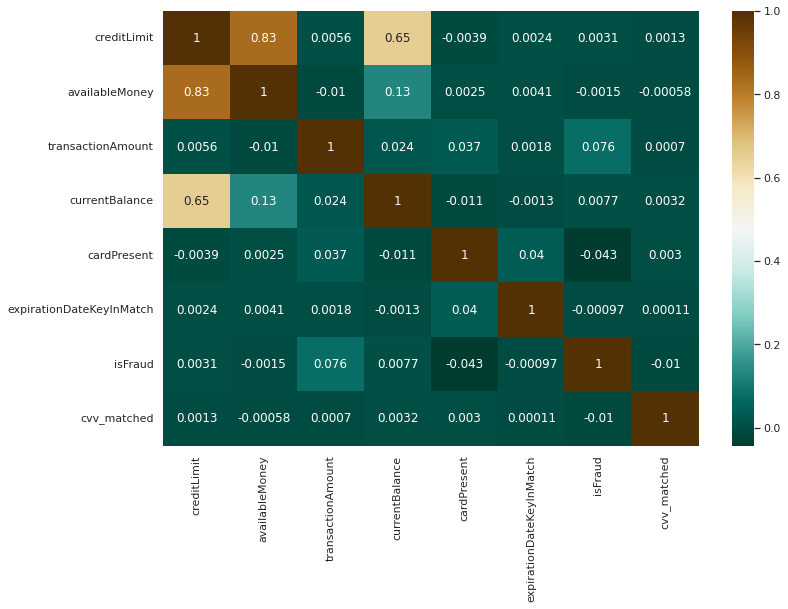

In [15]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='BrBG_r')

As seen in the correlation matrix, there is high positive correlation between availableMoney and creditLimit. We will visualize it with the scatter plot.

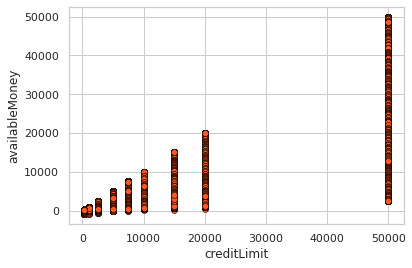

In [16]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
fig, ax = plt.subplots()
_ = plt.scatter(x=df['creditLimit'], y=df['availableMoney'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5) 
_ = ax.set(xlabel="creditLimit", ylabel="availableMoney")

In [17]:
numerical_cols = ['creditLimit','availableMoney','transactionAmount','currentBalance']
categorical_cols = ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               786363 non-null  int64  
 1   availableMoney            786363 non-null  float64
 2   transactionDateTime       786363 non-null  object 
 3   transactionAmount         786363 non-null  float64
 4   acqCountry                786363 non-null  object 
 5   merchantCountryCode       786363 non-null  object 
 6   posEntryMode              786363 non-null  object 
 7   posConditionCode          786363 non-null  object 
 8   merchantCategoryCode      786363 non-null  object 
 9   currentExpDate            786363 non-null  object 
 10  accountOpenDate           786363 non-null  object 
 11  dateOfLastAddressChange   786363 non-null  object 
 12  transactionType           786363 non-null  object 
 13  currentBalance            786363 non-null  f

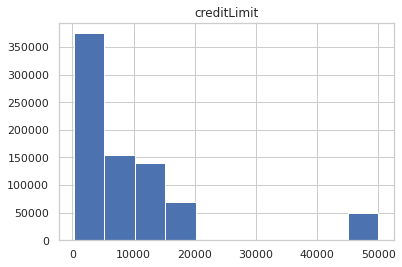

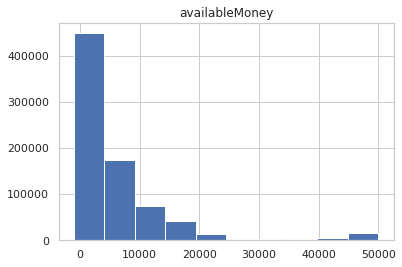

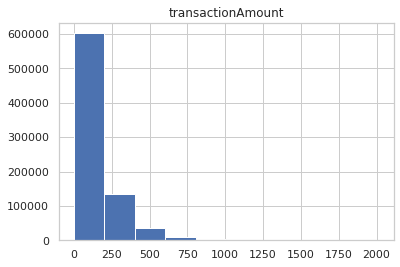

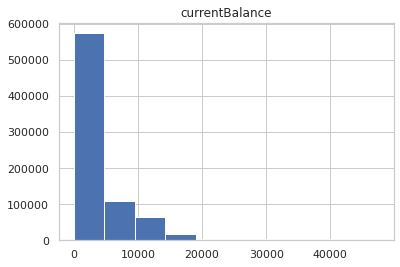

In [19]:
for col in numerical_cols:
  df[[col]].hist()

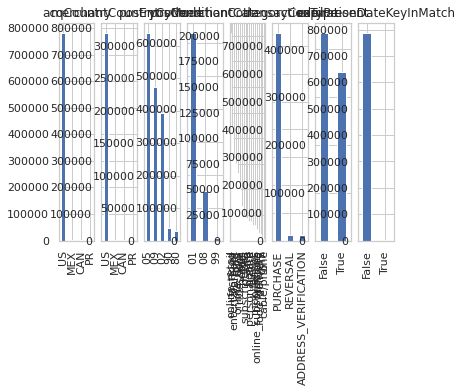

In [20]:
fig, ax = plt.subplots(1, len(categorical_cols))
for i, categorical_feature in enumerate(df[categorical_cols]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

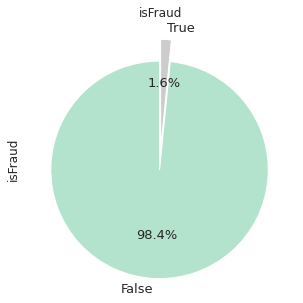

In [21]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'isFraud'
)

df['isFraud'].value_counts().plot.pie(**kwargs)

## <u>Feature Engineering</u>

We can see that there are certain dateTime feature, we have to convert to numerical data in order to feed to the ML algorithms

In [22]:
# converting in datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

In [23]:
# extractind year, month, day, hour, minute and seconds from datetime columns
df['transactionDateTime_year'] = df['transactionDateTime'].dt.year
df['transactionDateTime_month'] = df['transactionDateTime'].dt.month
df['transactionDateTime_day'] = df['transactionDateTime'].dt.day
df['transactionDateTime_hour'] = df['transactionDateTime'].dt.hour
df['transactionDateTime_minute'] = df['transactionDateTime'].dt.minute
df['transactionDateTime_second'] = df['transactionDateTime'].dt.second

df['currentExpDate_year'] = df['currentExpDate'].dt.year
df['currentExpDate_month'] = df['currentExpDate'].dt.month
df['currentExpDate_day'] = df['currentExpDate'].dt.day

df['accountOpenDate_year'] = df['accountOpenDate'].dt.year
df['accountOpenDate_month'] = df['accountOpenDate'].dt.month
df['accountOpenDate_day'] = df['accountOpenDate'].dt.day

df['dateOfLastAddressChange_year'] = df['dateOfLastAddressChange'].dt.year
df['dateOfLastAddressChange_month'] = df['dateOfLastAddressChange'].dt.month
df['dateOfLastAddressChange_day'] = df['dateOfLastAddressChange'].dt.day

In [24]:
# drop datetime column
df.drop('transactionDateTime',axis = 1,inplace = True)
df.drop('currentExpDate',axis = 1,inplace = True)
df.drop('accountOpenDate',axis = 1,inplace = True)
df.drop('dateOfLastAddressChange',axis = 1,inplace = True)

We can clearly see that data in some of the features are in text form and machine learning algorithms primarily require numerical data. We need to convert these data into numerical by either:
1. Label Encoding
    OR
2. One-hot encoding

Clearly here the text features like Country Code, transactionType, etc. do not have any rank/order in their data. So best approach would be to go with One-hot encoding.

In [25]:
categorical_cols = ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']
df = pd.get_dummies(df, columns = categorical_cols)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 63 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   creditLimit                                786363 non-null  int64  
 1   availableMoney                             786363 non-null  float64
 2   transactionAmount                          786363 non-null  float64
 3   currentBalance                             786363 non-null  float64
 4   isFraud                                    786363 non-null  bool   
 5   cvv_matched                                786363 non-null  int64  
 6   transactionDateTime_year                   786363 non-null  int64  
 7   transactionDateTime_month                  786363 non-null  int64  
 8   transactionDateTime_day                    786363 non-null  int64  
 9   transactionDateTime_hour                   786363 non-null  int64  
 10  transact

Finally our label column needs to be converted to:
0- FALSE
1 - TRUE

In [27]:
lb = LabelEncoder() 
df['isFraud'] = lb.fit_transform(df['isFraud'])

One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables. (Dummy Variable Trap is a scenario in which variables are highly correlated to each other). The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression. So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

VIF=1, Very Less Multicollinearity
VIF<5, Moderate Multicollinearity
VIF>5, Extreme Multicollinearity (This is what we have to avoid)

Ref: https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/

In [28]:
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

In [29]:
X = df.drop('isFraud',axis=1)

calculate_vif(X)

We can see that many of the columns have INF as VIF and dropping a few columns might definitely help bring down that. For now we will reserve this as future work to be done. (This step was taking too long and we could not come to a proper resolution to this issue)

In [30]:
df.drop(['availableMoney'],axis=1,inplace=True)


In [31]:
X = df.drop('isFraud',axis=1)

calculate_vif(X)

## <u>Standardization of Data : Z score and Standard scaler</u>
We will take all the numerical features and zscore them. However, on more experimentation we found that z score was not giving us the better results and we tried standard scaler as an alternative, which seems to be giving better results

In [32]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
numerical_cols = ['creditLimit','transactionAmount','currentBalance','transactionDateTime_year',
                  'transactionDateTime_month','transactionDateTime_day',
                  'transactionDateTime_hour','transactionDateTime_minute',
                  'transactionDateTime_second', 'currentExpDate_year',
                  'currentExpDate_month', 'currentExpDate_day', 'accountOpenDate_year',
                  'accountOpenDate_month', 'accountOpenDate_day',
                  'dateOfLastAddressChange_year', 'dateOfLastAddressChange_month',
                  'dateOfLastAddressChange_day']
#for col in numerical_cols:
  #df[col] = stats.zscore(df[col])
df[numerical_cols] = scale.fit_transform(df[numerical_cols])

#scaler = MinMaxScaler()



In [33]:
df.head()


,creditLimit,transactionAmount,currentBalance,isFraud,cvv_matched,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,transactionDateTime_hour,transactionDateTime_minute,...,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,cardPresent_False,cardPresent_True,expirationDateKeyInMatch_False,expirationDateKeyInMatch_True
0,-0.494962,-0.260184,-0.698224,0,1,0.0,0.393352,-0.311234,0.359577,-0.145372,...,0,1,0,0,1,0,1,0,1,0
1,-0.494962,-0.422918,-0.698224,0,1,0.0,0.975381,-0.539009,-0.940795,-1.415157,...,0,0,0,0,1,0,0,1,1,0
2,-0.494962,-0.876733,-0.698224,0,1,0.0,1.266396,-0.880673,-0.362852,-0.664830,...,0,0,0,0,1,0,1,0,1,0
3,-0.494962,-0.876733,-0.698224,0,1,0.0,1.557410,-0.652897,-1.374253,-0.895700,...,0,0,0,0,1,0,1,0,1,0
4,-0.494962,-0.445460,-0.698224,0,1,0.0,-1.061721,0.941534,1.370978,-1.472875,...,0,0,0,0,1,0,0,1,1,0


In [34]:
df.drop(['transactionDateTime_year','currentExpDate_day'],axis=1,inplace=True)

## <u>Model Trainings and Testing</u>

Splitting the Data into test and training

In [35]:
y = df.loc[:,'isFraud']

In [36]:
X = df.loc[:, df.columns != 'isFraud']

In [37]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=100, 
                                   test_size=0.25, 
                                   shuffle=True)

In [38]:
print('Training Shape\n--------------')
print(f'Input: {X_train.shape}')
print(f'Output: {y_train.shape}')

print('\nTesting Shape\n--------------')
print(f'Input: {X_test.shape}')
print(f'Output: {y_test.shape}')

Training Shape
--------------
Input: (589772, 59)
Output: (589772,)

Testing Shape
--------------
Input: (196591, 59)
Output: (196591,)


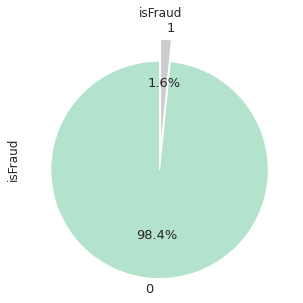

In [39]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'isFraud'
)

y_train.value_counts().plot.pie(**kwargs)

Clearing this is an imbalanced dataset and we will have to choose a method to balance the data. We will try with oversampling.

In [40]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 580453, 1: 9319})
After oversampling:  Counter({0: 580453, 1: 580453})


Before fitting, we will create a function, that can print the various metrics related to a model

In [41]:
def get_metrics(y_test, y_pred):
  # Model Accuracy
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)

  print('Confusion matrix\n\n', cm)

  print('\nTrue Positives(TP) = ', cm[0,0])

  print('\nTrue Negatives(TN) = ', cm[1,1])

  print('\nFalse Positives(FP) = ', cm[0,1])

  print('\nFalse Negatives(FN) = ', cm[1,0])

  print(classification_report(y_test, y_pred))
  TP = cm[0,0]
  TN = cm[1,1]
  FP = cm[0,1]
  FN = cm[1,0]
  precision = TP / float(TP + FP)


  print('Precision : {0:0.4f}'.format(precision))

  recall = TP / float(TP + FN)

  print('Recall : {0:0.4f}'.format(recall))

  


For imbalanced datasets, recall and AUC Curve gives better information about a model's performance. Especially, in our case, it was important for the model to be able to identify fraud transactions

In [42]:
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score
def print_auc_curve(model, X_test,y_test,model_name="Model"):
  pred_prob = model.predict_proba(X_test)

  # roc curve for models
  fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)


  # roc curve for tpr = fpr 
  random_probs = [0 for i in range(len(y_test))]
  p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

  # auc scores
  auc_score = roc_auc_score(y_test, pred_prob[:,1])

  print("AUC Score",auc_score)

  # matplotlib
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')

  # plot roc curves
  plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=model_name)

  plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
  # title
  plt.title('ROC curve')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')

  plt.legend(loc='best')
  plt.savefig(model_name,dpi=300)
  plt.show();

<u>Naive Bayes Classifier</u>

In [43]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

In [44]:
model.score(X_train,y_train)

0.6478310905447986

In [45]:
get_metrics(y_test,y_pred)

Accuracy: 0.33113418213448226
Confusion matrix

 [[ 62577 130916]
 [   577   2521]]

True Positives(TP) =  62577

True Negatives(TN) =  2521

False Positives(FP) =  130916

False Negatives(FN) =  577
              precision    recall  f1-score   support

           0       0.99      0.32      0.49    193493
           1       0.02      0.81      0.04      3098

    accuracy                           0.33    196591
   macro avg       0.50      0.57      0.26    196591
weighted avg       0.98      0.33      0.48    196591

Precision : 0.3234
Recall : 0.9909


AUC Score 0.5769782978288347


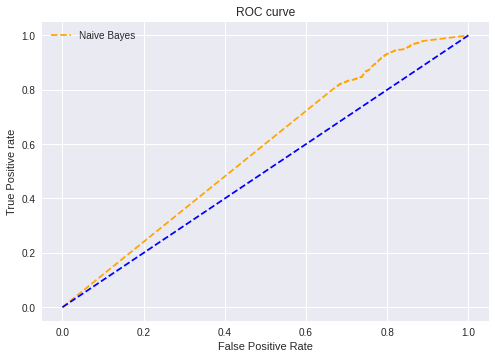

In [46]:
print_auc_curve(model,X_test,y_test,"Naive Bayes")

In [47]:
from sklearn.model_selection import cross_val_score
classifier = GaussianNB()
classes = y_train.values
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

[0.63398541 0.64988953 0.64877832 0.64938992 0.64934254]
0.6462771424144027


Clearly, we can see that there is major difference in accuracy for training and test data. Also cross validation is not helping with the accuracy. It's precision at predicting the fraud transaction also seems bad. The recall value appears to be high, because it seems have predicted a lot of false positives. Also, naive Bayes has almost no hyperparameters to tune. One thing to note is that due to the feature independence assumption, the class probabilities output by naive Bayes can be pretty inaccurate. We can try other models and check.

<u>Logistic Regession</u>

In [48]:
# all parameters not specified are set to their defaults
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [49]:
model.score(X_train,y_train)


0.869159949212081

In [50]:
get_metrics(y_test,y_pred)

Accuracy: 0.9072032799059977
Confusion matrix

 [[177525  15968]
 [  2275    823]]

True Positives(TP) =  177525

True Negatives(TN) =  823

False Positives(FP) =  15968

False Negatives(FN) =  2275
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    193493
           1       0.05      0.27      0.08      3098

    accuracy                           0.91    196591
   macro avg       0.52      0.59      0.52    196591
weighted avg       0.97      0.91      0.94    196591

Precision : 0.9175
Recall : 0.9873


AUC Score 0.6915467374676147


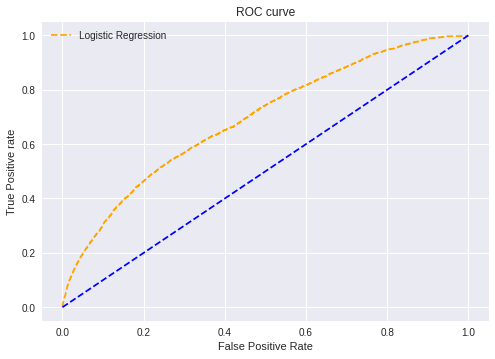

In [51]:
print_auc_curve(model,X_test,y_test,"Logistic Regression")

Hyperparameter Tuning

In [52]:
# all parameters not specified are set to their defaults
model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [53]:
get_metrics(y_test,y_pred)

Accuracy: 0.9046701018866581
Confusion matrix

 [[176985  16508]
 [  2233    865]]

True Positives(TP) =  176985

True Negatives(TN) =  865

False Positives(FP) =  16508

False Negatives(FN) =  2233
              precision    recall  f1-score   support

           0       0.99      0.91      0.95    193493
           1       0.05      0.28      0.08      3098

    accuracy                           0.90    196591
   macro avg       0.52      0.60      0.52    196591
weighted avg       0.97      0.90      0.94    196591

Precision : 0.9147
Recall : 0.9875


AUC Score 0.700204941162931


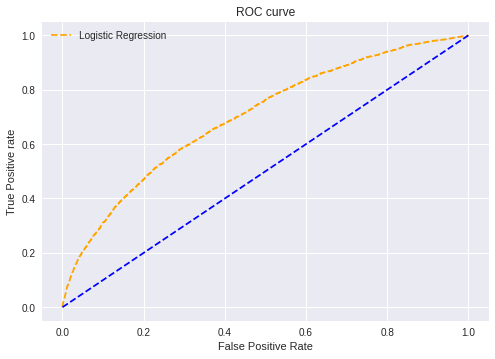

In [54]:
print_auc_curve(model,X_test,y_test,"Logistic Regression")

<u> Decision Tree Classifier </u>

In [55]:
model = DecisionTreeClassifier()
# Training and Predicting

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
model.score(X_train,y_train)

1.0

In [57]:
get_metrics(y_test,y_pred)

Accuracy: 0.9587620999944046
Confusion matrix

 [[188169   5324]
 [  2783    315]]

True Positives(TP) =  188169

True Negatives(TN) =  315

False Positives(FP) =  5324

False Negatives(FN) =  2783
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    193493
           1       0.06      0.10      0.07      3098

    accuracy                           0.96    196591
   macro avg       0.52      0.54      0.53    196591
weighted avg       0.97      0.96      0.96    196591

Precision : 0.9725
Recall : 0.9854


AUC Score 0.5370816474955212


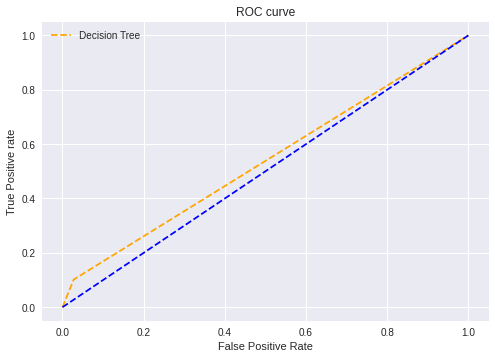

In [58]:
print_auc_curve(model,X_test,y_test,"Decision Tree")

<u>Random Forrest Classifer</u>

In [59]:
# creating a RF classifier
model = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)


In [60]:
model.score(X_train,y_train)

0.9999965544152585

In [61]:
get_metrics(y_test,y_pred)

Accuracy: 0.9835038226571918
Confusion matrix

 [[193259    234]
 [  3009     89]]

True Positives(TP) =  193259

True Negatives(TN) =  89

False Positives(FP) =  234

False Negatives(FN) =  3009
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    193493
           1       0.28      0.03      0.05      3098

    accuracy                           0.98    196591
   macro avg       0.63      0.51      0.52    196591
weighted avg       0.97      0.98      0.98    196591

Precision : 0.9988
Recall : 0.9847


AUC Score 0.7728301089370695


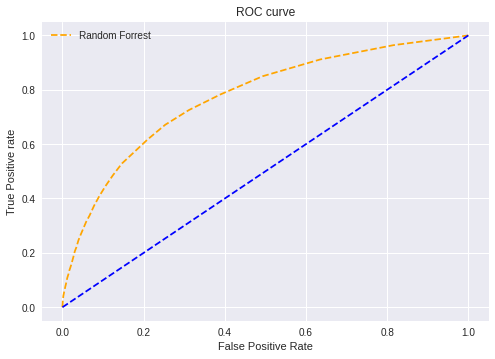

In [62]:
print_auc_curve(model,X_test,y_test,"Random Forrest")

Hyper-paramter tuning

In [63]:
y = df.loc[:,'isFraud']
X = df.loc[:, df.columns != 'isFraud']
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=100, 
                                   test_size=0.25, 
                                   shuffle=True)
# creating a RF classifier
model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample',criterion='entropy',max_features = 'log2',verbose=1, n_jobs=-1) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.8s finished


In [64]:
get_metrics(y_test,y_pred)

Accuracy: 0.9843176951132045
Confusion matrix

 [[193493      0]
 [  3083     15]]

True Positives(TP) =  193493

True Negatives(TN) =  15

False Positives(FP) =  0

False Negatives(FN) =  3083
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    193493
           1       1.00      0.00      0.01      3098

    accuracy                           0.98    196591
   macro avg       0.99      0.50      0.50    196591
weighted avg       0.98      0.98      0.98    196591

Precision : 1.0000
Recall : 0.9843


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    6.6s finished


AUC Score 0.7632671027409366


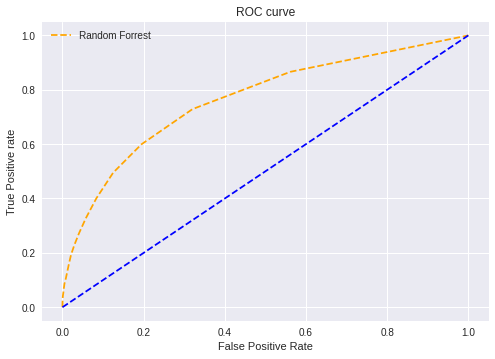

In [65]:
print_auc_curve(model,X_test,y_test,"Random Forrest")

We can clearly see the accuracy is high. But the reason is it is predicting everything as 0 and this might be the reason. The model's ability to predict fraud i.e. data with label 1 seems to be pretty low. Hence, another approach to dealing with imbalanced dataset is undersampling and we can try that next.

### <u>Undersampling the data set</u>

In [66]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.isFraud==0]
df_minority = df[df.isFraud==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=df_minority.shape[0],     # to match minority class
                                 random_state=123)

In [67]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

We will again apply the models - Naive Bayes, Logistic Regression and Random Forrest

In [68]:
y = df_downsampled.loc[:,'isFraud']
X = df_downsampled.loc[:, df.columns != 'isFraud']
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=100, 
                                   test_size=0.25, 
                                   shuffle=True)

In [69]:
print('Training Shape\n--------------')
print(f'Input: {X_train.shape}')
print(f'Output: {y_train.shape}')

print('\nTesting Shape\n--------------')
print(f'Input: {X_test.shape}')
print(f'Output: {y_test.shape}')

Training Shape
--------------
Input: (18625, 59)
Output: (18625,)

Testing Shape
--------------
Input: (6209, 59)
Output: (6209,)


In [70]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 13,
    explode    = (0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'isFraud'
)

0.5557583892617449

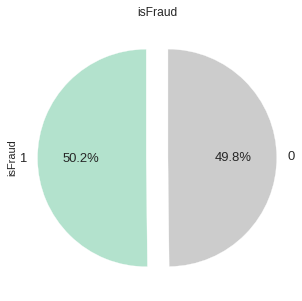

In [71]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test)

y_train.value_counts().plot.pie(**kwargs)

model.score(X_train,y_train)

In [72]:
get_metrics(y_test,y_pred)

Accuracy: 0.5517796746658077
Confusion matrix

 [[ 385 2752]
 [  31 3041]]

True Positives(TP) =  385

True Negatives(TN) =  3041

False Positives(FP) =  2752

False Negatives(FN) =  31
              precision    recall  f1-score   support

           0       0.93      0.12      0.22      3137
           1       0.52      0.99      0.69      3072

    accuracy                           0.55      6209
   macro avg       0.73      0.56      0.45      6209
weighted avg       0.73      0.55      0.45      6209

Precision : 0.1227
Recall : 0.9255


AUC Score 0.58398017238803


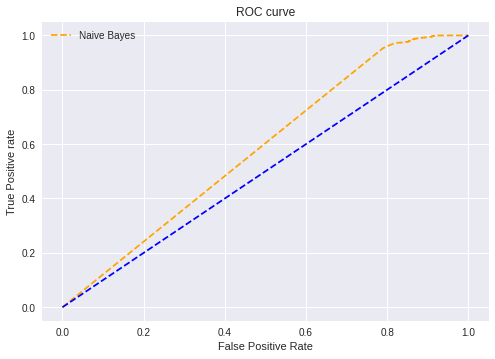

In [73]:
print_auc_curve(model,X_test,y_test,"Naive Bayes")

In [74]:
# all parameters not specified are set to their defaults
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6785503355704698

In [75]:
get_metrics(y_test,y_pred)

Accuracy: 0.6733773554517636
Confusion matrix

 [[2035 1102]
 [ 926 2146]]

True Positives(TP) =  2035

True Negatives(TN) =  2146

False Positives(FP) =  1102

False Negatives(FN) =  926
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      3137
           1       0.66      0.70      0.68      3072

    accuracy                           0.67      6209
   macro avg       0.67      0.67      0.67      6209
weighted avg       0.67      0.67      0.67      6209

Precision : 0.6487
Recall : 0.6873


AUC Score 0.740524303341834


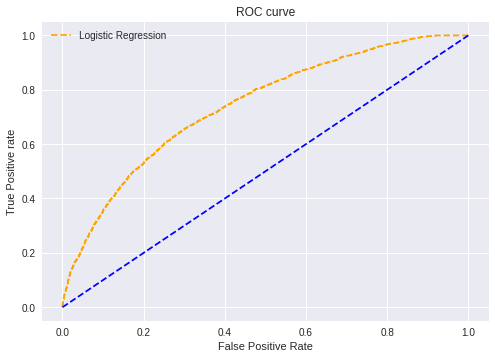

In [76]:
print_auc_curve(model,X_test,y_test,"Logistic Regression")

In [77]:
# creating a RF classifier
model = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)

model.score(X_train,y_train)

1.0

In [78]:
get_metrics(y_test,y_pred)

Accuracy: 0.7274923498147849
Confusion matrix

 [[2297  840]
 [ 852 2220]]

True Positives(TP) =  2297

True Negatives(TN) =  2220

False Positives(FP) =  840

False Negatives(FN) =  852
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3137
           1       0.73      0.72      0.72      3072

    accuracy                           0.73      6209
   macro avg       0.73      0.73      0.73      6209
weighted avg       0.73      0.73      0.73      6209

Precision : 0.7322
Recall : 0.7294


AUC Score 0.8009751408757039


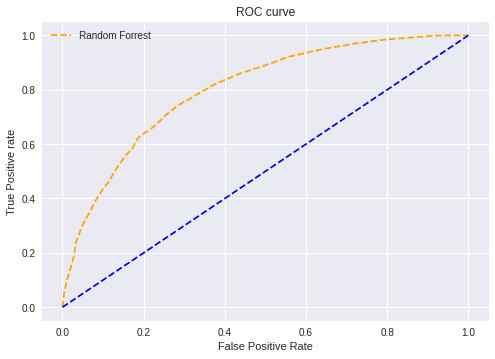

In [79]:
print_auc_curve(model,X_test,y_test,"Random Forrest")

Undersampling seems to be creating better models for our data. Also, the ensemble algorithm - RandomForrest classifier seems to be giving us the best result so far. 

In [80]:
'''prob = model.predict_proba(X_test)
y_pred_prob =[]
for p in prob:
  y_pred_prob.append(1 if p[1]>=0.4 else 0)
print(y_pred_prob)'''

'prob = model.predict_proba(X_test)\ny_pred_prob =[]\nfor p in prob:\n  y_pred_prob.append(1 if p[1]>=0.4 else 0)\nprint(y_pred_prob)'

<u> Hyperparameter Tuning with Grid Search CV</u> <br>
Logistic Regression has couple of hyperparameters which we can tune to get better results. We can do a Grid Search to find the best values for these parameters Logistic Regression has two parameters 'C' and 'penalty' to be optimised by GridSearchCV. Random Forest has few parameters as well and we can try to experiment with them

In [82]:
# Create first pipeline for base without reducing features.
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [{'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(10,50,10)),
    'classifier__criterion':['gini','entropy'],
    'classifier__bootstrap':[True,False],
    'classifier__class_weight':['balanced','balanced_subsample',None]
    }]
    #{'classifier' : [LogisticRegression()],
    # 'classifier__penalty' : ['l1', 'l2'],
    #'classifier__C' : np.logspace(-4, 4, 20),
    #'classifier__solver' : ['liblinear']},'''
    

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


In [83]:
best_clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(bootstrap=False,
                                                                class_weight='balanced',
                                                                max_features=10,
                                                                n_estimators=90)],
                          'classifier__bootstrap': [True, False],
                          'classifier__class_weight': ['balanced',
                                                       'balanced_subsample',
                                                       None],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_features': [10, 20, 30, 40],
                          'classifier__n_estimators': [10, 20, 30, 40, 50, 60,
     

In [84]:
best_clf.best_estimator_


Pipeline(steps=[('classifier',
                 RandomForestClassifier(bootstrap=False,
                                        class_weight='balanced',
                                        max_features=10, n_estimators=90))])

In [85]:
print(best_clf.best_params_,best_clf.best_score_)

{'classifier': RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features=10, n_estimators=90), 'classifier__bootstrap': False, 'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_features': 10, 'classifier__n_estimators': 90} 0.7212885906040268


In [86]:
# creating a RF classifier
model = best_clf.best_estimator_
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
model.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = model.predict(X_test)

model.score(X_train,y_train)

1.0

In [87]:
get_metrics(y_test,y_pred)

Accuracy: 0.7300692543082622
Confusion matrix

 [[2296  841]
 [ 835 2237]]

True Positives(TP) =  2296

True Negatives(TN) =  2237

False Positives(FP) =  841

False Negatives(FN) =  835
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3137
           1       0.73      0.73      0.73      3072

    accuracy                           0.73      6209
   macro avg       0.73      0.73      0.73      6209
weighted avg       0.73      0.73      0.73      6209

Precision : 0.7319
Recall : 0.7333


AUC Score 0.8031569190973329


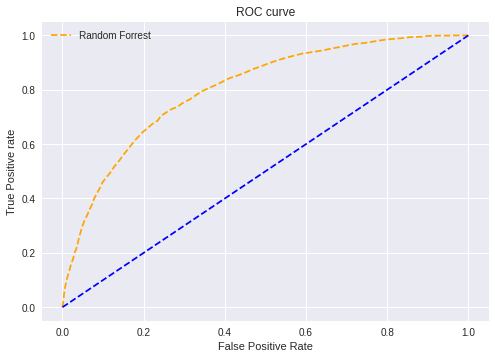

In [88]:
print_auc_curve(model,X_test,y_test,"Random Forrest")

<u>Cross Validation</u>

In [89]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    model.fit(X.iloc[train], y.iloc[train])


In [90]:
get_metrics(y_test,y_pred)

Accuracy: 0.7300692543082622
Confusion matrix

 [[2296  841]
 [ 835 2237]]

True Positives(TP) =  2296

True Negatives(TN) =  2237

False Positives(FP) =  841

False Negatives(FN) =  835
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3137
           1       0.73      0.73      0.73      3072

    accuracy                           0.73      6209
   macro avg       0.73      0.73      0.73      6209
weighted avg       0.73      0.73      0.73      6209

Precision : 0.7319
Recall : 0.7333


AUC Score 0.9925914695901074


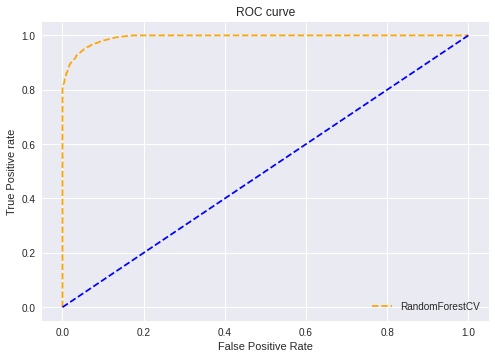

In [91]:
print_auc_curve(model,X_test,y_test,"RandomForestCV")

RandomForest with Cross Validation and hyperparameters obtained by GridSearchCV, seems to be give the best AUC Score.

### <u> Saving the model </u>

In [92]:
import pickle

In [95]:
# save the model to disk
filename = 'fraud_detection_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
